<a href="https://colab.research.google.com/github/angekonan715/Data-Science-Project/blob/main/StrokePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load some test data
import seaborn as sns
import matplotlib.pyplot as plt
!pip install lets-plot
from sklearn import metrics
from lets_plot import *
LetsPlot.setup_html()
!pip install imblearn
import pandas as pd
import numpy as np
stroke = pd.read_csv('https://raw.githubusercontent.com/angekonan715/DataScience-Projects/refs/heads/main/healthcaredatasetstroke.csv')
stroke.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.7 MB/s eta 0:00:00


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
#Unique value in each columns except id
stroke.nunique()

,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


In [4]:
for i in stroke.columns:
  if (i != 'id'):
    print(stroke[i].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: count, Length: 104, dtype: int64
hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
avg_glucose_level
93.88     6
72.49     5
91.85     5
84.10     5
91.68     5
         ..
202.05    1
71.42     1
107.50    1
55.57     1
94.98     1
Name: count, Length: 3979, dtype: int64
bmi
28.7    41
28.4    38
27.7    37
26.7    37
26.1    37
        ..
46.8     1
58.1     1
50.4     1
54.1     1
14.9     1
Name: count, Length: 418

In [5]:
#remove all people age less than 1
#stroke = stroke[stroke['age'] >= 1]
#convert all my folat columns to two 3 decimal point
stroke = stroke.round({'avg_glucose_level': 2, 'bmi': 2})

In [6]:
# Do men experience more stroke compared to women
stroke['gender'].value_counts()
# remove other from my dataset
stroke = stroke[stroke['gender'] != 'Other']
# relationship between heart disease and strike
ggplot(stroke, aes(x='heart_disease', fill='gender')) + geom_bar() + ggtitle('Relationship between Heart Disease and Stroke')

In [7]:
# Visualisation age distribution
ggplot(stroke, aes(x='age', fill='gender')) + geom_histogram() + ggtitle('Age Distribution')

In [8]:
# Visualize bmi distribution
ggplot(stroke, aes(x='bmi', fill='gender')) + geom_histogram() + ggtitle('BMI Distribution')

In [9]:
# visualise avg glucose level
ggplot(stroke, aes(x='avg_glucose_level', fill='gender')) + geom_histogram() + ggtitle('Average Glucose Level Distribution')
#

In [10]:
# visualise bmi
ggplot(stroke, aes(x='bmi', fill='gender')) + geom_histogram() + ggtitle('BMI Distribution')

In [11]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [12]:
# fill in all the bmi missing value with the average bmi
stroke['bmi'].fillna(stroke['bmi'].mean(), inplace=True)

<ipython-input-12-8cd15582f53b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke['bmi'].fillna(stroke['bmi'].mean(), inplace=True)


In [13]:
#identify all the outliers from each columns with a function
def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))]
    return outliers
# list of columns whosee datatype is numeric
numeric_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
for i in numeric_columns:
  if (i != 'id') and (i != 'stroke'):
    print(find_outliers_IQR(stroke[i]))

Series([], Name: age, dtype: float64)
4       1
6       1
10      1
15      1
17      1
       ..
5088    1
5091    1
5093    1
5100    1
5105    1
Name: hypertension, Length: 498, dtype: int64
0       1
2       1
6       1
11      1
13      1
       ..
4855    1
4869    1
4921    1
4986    1
5008    1
Name: heart_disease, Length: 276, dtype: int64
0       228.69
1       202.21
3       171.23
4       174.12
5       186.21
         ...  
5061    223.78
5062    211.58
5063    179.38
5064    193.88
5076    174.37
Name: avg_glucose_level, Length: 627, dtype: float64
21      48.9
66      47.5
113     56.6
254     50.1
258     54.6
        ... 
4906    54.1
4952    56.6
5009    49.5
5057    47.6
5103    46.9
Name: bmi, Length: 126, dtype: float64


In [14]:
stroke['age'].quantile(0.75)

np.float64(61.0)

In [15]:
features = ['gender',
            'age',
            'hypertension',
            'heart_disease',
            'ever_married',
            'work_type',
            'Residence_type',
            'avg_glucose_level',
            'bmi',
            'smoking_status'
            ]

In [16]:
# get dummies
X = pd.get_dummies(stroke[features], drop_first=True)
columns_to_drop = ['work_type_Never_worked', 'ever_married_Yes', 'work_type_children']  # Original columns to drop
for column in columns_to_drop:
    try:
        X = X.drop(column, axis=1)
    except KeyError:
        print(f"Column '{column}' not found in DataFrame, skipping.")
y = stroke['stroke']

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now use X_resampled and y_resampled for training your model

In [ ]:
X.info()

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.42)

# Build the decision tree
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, y_train)

# Test it

# Note that this gives us an accuracy score, which may not be the best metric.
# See the SciKit-Learn docs for more ways to assess a model's performance, as
# well as methods for cross validation.

DecisionTreeClassifier()

In [22]:
## test our model
y_pred_dt = clf.predict(X_test)
## Evaluate our classification model: Decision tree
clf_report = metrics.classification_report(y_pred_dt, y_test)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1990
           1       0.93      0.89      0.91      2093

    accuracy                           0.91      4083
   macro avg       0.91      0.91      0.91      4083
weighted avg       0.91      0.91      0.91      4083



Random Forest Classification

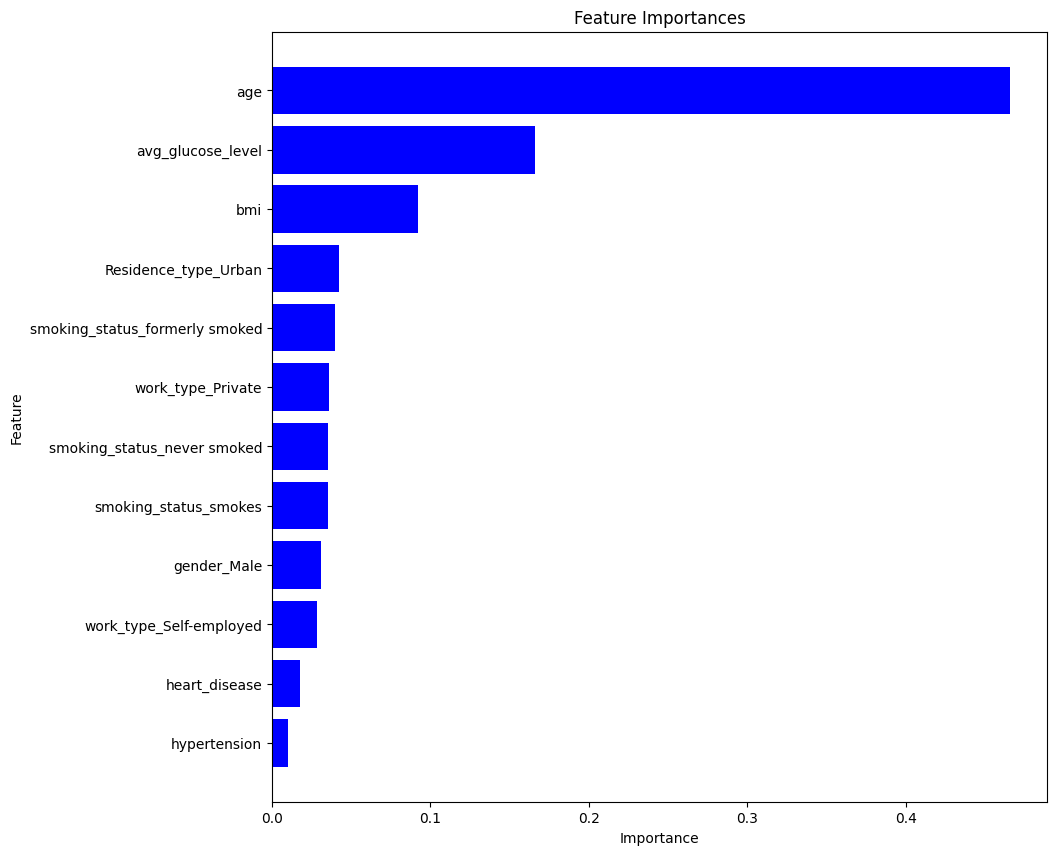

In [23]:
importances = clf.feature_importances_
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

XGboost

In [24]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2077
           1       0.93      0.96      0.94      2006

    accuracy                           0.94      4083
   macro avg       0.94      0.94      0.94      4083
weighted avg       0.94      0.94      0.94      4083



XGBoost Model


In [25]:
#!pip install xgboost
from xgboost import XGBClassifier

# Create and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)  # You can adjust hyperparameters here
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2077
           1       0.93      0.96      0.94      2006

    accuracy                           0.94      4083
   macro avg       0.94      0.94      0.94      4083
weighted avg       0.94      0.94      0.94      4083



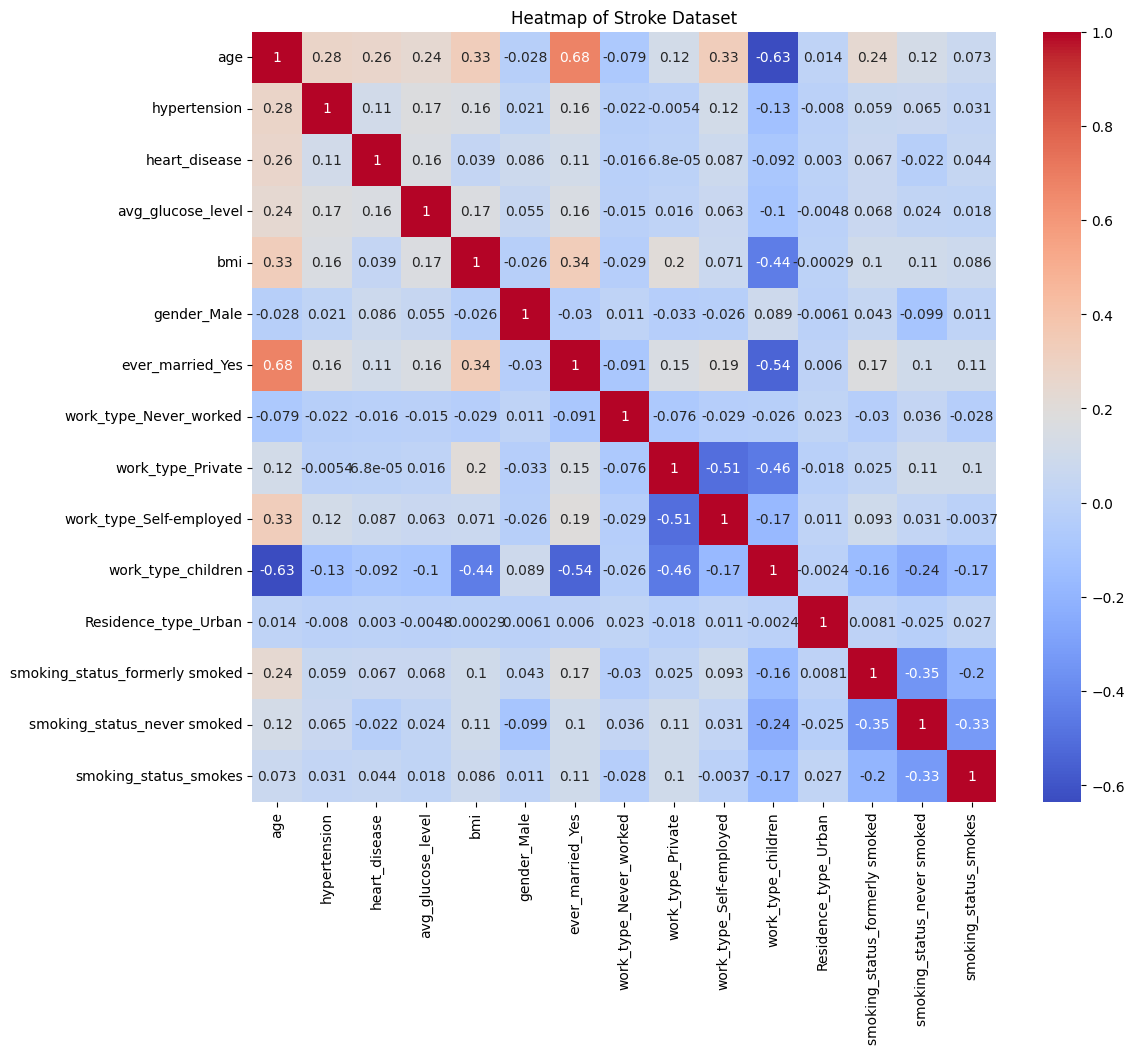

In [26]:
# heatmap
correlation_matrix = pd.get_dummies(stroke[features], drop_first=True).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Stroke Dataset')
plt.show()

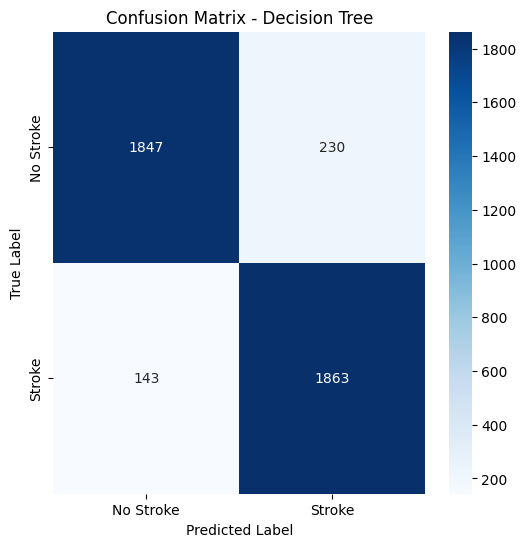

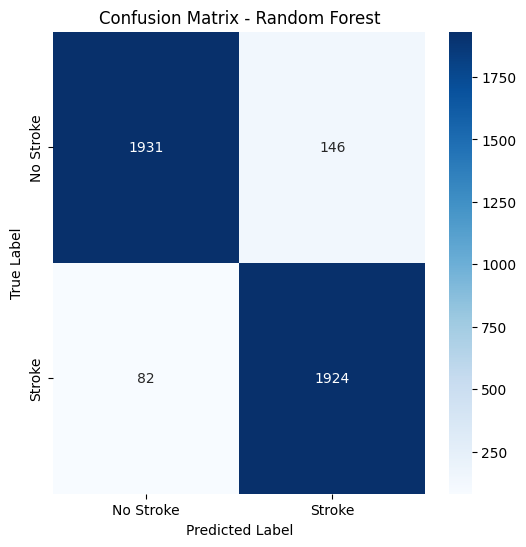

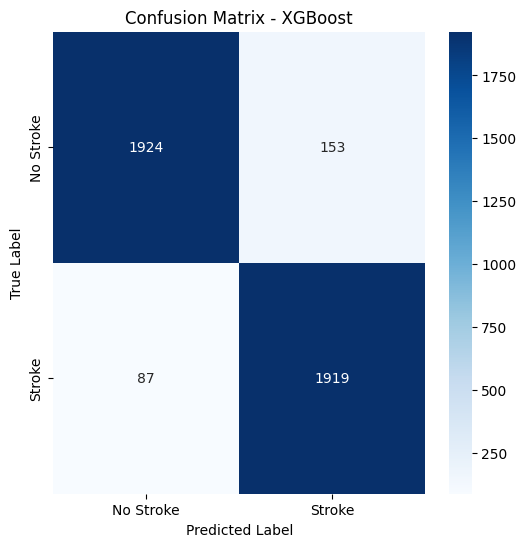

In [27]:
# Confusion metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your models trained and predictions stored in:
# y_pred_dt (Decision Tree)
# y_pred_rf (Random Forest)
# y_pred_xgb (XGBoost)
# and y_test (true labels)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['No Stroke', 'Stroke'],
              yticklabels=['No Stroke', 'Stroke'])
  plt.title(f'Confusion Matrix - {model_name}')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')